# Sequential learning Homework

# Part 1 : Bandit convex optimisation

# Question 1

The adversary is oblivious in this setting. In fact the losses are chosen before the games begins, so the environment cannot adapt to the decisions made by the player.

# Question 2

The regret is defined as : $R_T = \sum_{t=1}^T l_t(\theta_t) - inf_{\theta \in \Theta} \sum_{t=1}^T l_t(\theta)$.

# Question 3.a)

When $d = 1$, $\mathbb{S}_1 = \{-1, 1\}$. So the LHS term is in fact $\mathbb{E}_{u_t}[\frac{d}{\delta}l_t(\hat{\theta}_t +\delta u_t)u_t] = \frac{1}{2\delta}[l_t(\hat{\theta}_t + \delta) - l_t(\hat{\theta}_t - \delta)]$. \
The RHS term is the limit of the derivative rate of $\hat{l_t}$ at $\hat{\theta}_t$:
$$\nabla{\hat{l}_t}(\hat{\theta}_t) = \lim_{h \rightarrow 0} \frac{1}{\delta h} (\hat{l_t}(\hat{\theta}_t + \delta h) - \hat{l_t}(\hat{\theta}_t))$$
$$\nabla{\hat{l}_t}(\hat{\theta}_t) = \lim_{h \rightarrow 0} \frac{1}{\delta h} (\frac{1}{2}\int_{-1}^1 l_t(\hat{\theta}_t + \delta v + \delta h)dv - \frac{1}{2}\int_{-1}^1 l_t(\hat{\theta}_t + \delta v)dv)$$
We change the variables $v' = \delta v + \delta h$ and $v' = \delta v$ in the two integrals:
$$\nabla{\hat{l}_t}(\hat{\theta}_t) = \lim_{h \rightarrow 0} \frac{1}{\delta h} (\frac{1}{2\delta}\int_{-\delta + \delta h}^{\delta + \delta h} l_t(\hat{\theta}_t + v)dv - \frac{1}{2\delta}\int_{-\delta}^{\delta} l_t(\hat{\theta}_t + v)dv)$$

$$\nabla{\hat{l}_t}(\hat{\theta}_t) = \lim_{h \rightarrow 0} \frac{1}{\delta h} (\frac{1}{2\delta}\int_{\delta}^{\delta + \delta h} l_t(\hat{\theta}_t + v)dv - \frac{1}{2\delta}\int_{-\delta}^{-\delta + \delta h} l_t(\hat{\theta}_t + v)dv)$$

Then it is quite easy to show that $\lim_{h \rightarrow 0} \frac{1}{\delta h} \int_{\delta}^{\delta + \delta h} l_t(\hat{\theta}_t + v)dv = l_t(\hat{\theta}_t + \delta)$ and $\lim_{h \rightarrow 0} \frac{1}{\delta h} \int_{-\delta}^{-\delta + \delta h} l_t(\hat{\theta}_t + v)dv = l_t(\hat{\theta}_t - \delta)$


Hence :
$$\boxed{\mathbb{E}_{u_t}[\frac{d}{\delta}l_t(\hat{\theta}_t +\delta u_t)u_t] = \nabla{\hat{l}_t(\hat{\theta}_t)}}$$


# Question 3.b)

Because the losses are not necessarily differentiable, we should use this version of Lipschitz functions: $|l_t(x) - l_t(y)| \leq G ||x - y||$. \
Let $\theta \in \Theta_{\delta}$ :
$$|\hat{l}_t(\theta) - l_t(\theta)| = |\mathbb{E}_v[l_t(\theta + \delta v) - l_t(\theta)]|$$
Using Jensen's inequality with the $|\cdot|$ function:
$$|\hat{l}_t(\theta) - l_t(\theta)| \leq \mathbb{E}_v[|l_t(\theta + \delta v) - l_t(\theta)|]$$
Using that $l_t$ is $G$-Lipschitz:
$$|\hat{l}_t(\theta) - l_t(\theta)| \leq \mathbb{E}_v[G||\delta v||] = G\delta \mathbb{E}_v[||v||] \leq G\delta$$
Hence:
$$\boxed{|\hat{l}_t(\theta) - l_t(\theta)| \leq G\delta}$$

# Question 4.a)

We have for every $\theta \in \Theta_\delta$:
$$\nabla{h}_t(\theta) = \nabla{\hat{l}_t(\theta)} + \xi_t $$
We can show that $\theta_t^{OGD} = \hat{\theta}_t$ for every $t$, under the conidtion that we initialize OGD with $\theta_1^{OGD} = 0$. In fact, this can be easily shown by induction because the equality at time $t$ implies that the 'gradient' update is the same $\nabla{h}_t(\hat{\theta}_t) = \frac{d}{\delta}l_t(\theta_t)u_t$, so the equality still stands at time $t+1$.

# Question 4.b)

We should use the result from the course on OGD, applied to the sequence of losses $h_t$. We can use the same diameter $D$ defined for $\Theta$ because $\Theta_\delta \subset \Theta$ (because $0 \in \Theta$). We have to find a Lipschitz constant for $h_t$. In the proof the Lipschitz constant is only used to bound $||\nabla{h}_t(\theta_t)||$. Because $\theta_t^{OGD} = \hat{\theta}_t$, we have $\nabla{h}_t(\hat{\theta}_t) = \frac{d}{\delta}l_t(\theta_t)u_t$ and hence:

$$ ||\nabla{h}_t(\theta_t)|| \leq \frac{d^2}{\delta ^2} $$.

Using the result from the course on OGD:

$$\boxed{\sum_{t=1}^T h_t(\hat{\theta}_t) - h_t(\theta_\delta^*)\leq \eta \frac{d^2}{2\delta^2} T + \frac{D^2}{2\eta}} $$


# Question 4.c)

Taking the expectation of the above equality:
$$\sum_{t=1}^T \mathbb{E}[h_t(\hat{\theta}_t)] - \mathbb{E}[h_t(\theta_\delta^*)] \leq \eta \frac{d^2}{2\delta^2} T + \frac{D^2}{2\eta} $$
We have:
$$\mathbb{E}[h_t(\hat{\theta}_t)] = \mathbb{E}[\hat{l}_t(\hat{\theta}_t)] + \mathbb{E}[<\frac{d}{\delta}l_t(\theta_t)u_t, \hat{\theta}_t>] - \mathbb{E}[<\nabla{\hat{l}_t(\hat{\theta}_t)}, \hat{\theta}_t>]$$

Because $\hat{\theta}_t$ depends only on $u_1, ..., u_{t-1}$, we should make appear the conditional expectation w.r.t. $u_1, ..., u_{t-1}$ in the term $\mathbb{E}[<\frac{d}{\delta}l_t(\theta_t)u_t, \hat{\theta}_t>]$:

$$\mathbb{E}[<\frac{d}{\delta}l_t(\theta_t)u_t, \hat{\theta}_t>] = \mathbb{E}[\mathbb{E}[<\frac{d}{\delta}l_t(\theta_t)u_t, \hat{\theta}_t>|u_1, ..., u_{t-1}]] = \mathbb{E}[<\mathbb{E}[\frac{d}{\delta}l_t(\theta_t)u_t|u_1, ..., u_{t-1}], \hat{\theta}_t>]$$

Using the result of question 3.a):

$$\mathbb{E}[\frac{d}{\delta}l_t(\theta_t)u_t|u_1, ..., u_{t-1}] = \nabla{\hat{l}_t}(\hat{\theta_t})$$

So :

$$\mathbb{E}[<\frac{d}{\delta}l_t(\theta_t)u_t, \hat{\theta}_t>] = \mathbb{E}[<\nabla{\hat{l}_t}(\hat{\theta_t}), \hat{\theta}_t>]$$

Thus two terms cancel in the expectation so :

$$\mathbb{E}[h_t(\hat{\theta}_t)] = \mathbb{E}[\hat{l}_t(\hat{\theta}_t)]$$

By the same arguments, we can show that : $\mathbb{E}[h_t(\theta_\delta^*)] = \hat{l}_t(\theta_\delta^*)$

So :

$$\boxed{\sum_{t=1}^T \mathbb{E}[\hat{l}_t(\hat{\theta}_t)] - \hat{l}_t(\theta_\delta^*) \leq \eta \frac{d^2}{2\delta^2} T + \frac{D^2}{2\eta}}$$


# Question 5

Let $\theta^* \in \Theta, \theta_\delta^* \in \Theta_\delta$:

$$R_T(\theta^*) = \sum_{t=1}^T l_t(\theta_t) - l_t(\theta^*)$$

$$R_T(\theta^*) = \sum_{t=1}^T (l_t(\theta_t) - l_t(\hat{\theta}_t)) + (l_t(\hat{\theta}_t) - \hat{l}_t(\hat{\theta}_t)) - (l_t(\theta^*) - l_t(\theta_\delta^*)) - (l_t(\theta_\delta^*) - \hat{l}_t(\theta_\delta^*)) + \hat{l}_t(\hat{\theta}_t) - \hat{l}_t(\theta_\delta^*)$$

By taking $\theta_\delta^* = (1-\delta)\theta^*$, so that $||\theta_\delta^* -  \theta^*|| = \delta ||\theta^*|| \leq \delta D$, we can upper bound the four terms in parenthesis with the G-Lipshchitz hypothesis and the result of question 3.b):

$$R_T(\theta^*) \leq 3G\delta T + G\delta DT + \sum_{t=1}^T \hat{l}_t(\hat{\theta}_t) - \hat{l}_t((1-\delta) \theta^*)$$

We take the sup w.r.t. $\theta^*$:
$$R_T \leq 3G\delta T + G\delta DT + \sum_{t=1}^T \hat{l}_t(\hat{\theta}_t) - inf_{\theta^* \in \Theta}\hat{l}_t((1-\delta) \theta^*)$$
Now we take the expectation:
$$\mathbb{E}[R_T] \leq 3G\delta T + G\delta DT + \sum_{t=1}^T \mathbb{E}[\hat{l}_t(\hat{\theta}_t)] - inf_{\theta^* \in \Theta}\hat{l}_t((1-\delta) \theta^*)$$

Using the result of the previous question, we can upper bound the sum in the RHS term:

$$\mathbb{E}[R_T] \leq 3G\delta T + G\delta DT + \eta \frac{d^2}{2\delta^2} T + \frac{D^2}{2\eta}$$

Because $\Theta$ contains the unit ball, $D \geq 2$ so :

$$\boxed{\mathbb{E}[R_T] \leq 4G\delta DT + \eta \frac{d^2}{\delta^2} T + \frac{D^2}{\eta}}$$


# Question 6

We should minimize the power of $T$ in the RHS term. Let's say $a, b$ are the powers of T in $\delta$ and $\eta$ respectively. The power of $T$ in the RHS term is equal to $\max(1+b-2a, -b, 1+a)$. \
Let's fix $a$. The third term in the max is constant w.r.t. $b$ so we have to minimize $max(1+b-2a, -b)$ which is obtained when these lines intersect at $b = a - 0.5$. So the minimum is $max(0.5-a, 1+a)$. Then, again, this quantity is minimal when these two lines with opposite slopes intersect at $a = -\frac{1}{4}$. Thus $b = -\frac{3}{4}$. \
Let's say that $\delta = K_1 T^a$ and $\eta = K_2 T^b$. We set the three terms in the RHS equal :
$$4GK_1D = K_2\frac{d^2}{K_1^2}, 4GK_1D = \frac{D^2}{K_2}$$

We get:

$$\boxed{\delta = \sqrt{\frac{d}{4G}}T^{-\frac{1}{4}}}$$
$$\boxed{\eta = \frac{D}{\sqrt{4Gd}}T^{-\frac{3}{4}}}$$
$$\boxed{\mathbb{E}[R_T] \leq 6\sqrt{Gd}DT^{\frac{3}{4}}}$$

# Question 7.a)

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [194]:
def OGD(T=1000, d=2, D = 2, nruns = 1, theta_0=None,):

    theta_star = 0.5/np.arange(1, d+1)
    x = np.random.multivariate_normal(np.zeros(d), np.eye(d), T)
    epsilon = np.random.normal(0, np.sqrt(0.1), T)
    y = x @ theta_star + epsilon

    cum_regrets = []

    #we compute a Lipschitz constant for the gradient of the loss
    G = 2*np.max(np.linalg.norm(x, axis=1) * (np.linalg.norm(x, axis=1) + np.abs(y)))

    #we use the theoretical value of the step size
    eta = D/(G*np.sqrt(T))

    def loss(t, theta):
        return (y[t] - np.dot(x[t], theta))**2
    
    def grad_loss(t, theta):
        return -2 * x[t] * (y[t] - np.dot(x[t], theta))

    #projection onto the ball
    def projection(theta):
        a = np.linalg.norm(theta)
        return theta if a < 1 else theta/a
    
    for _ in range(nruns):
        regret = []
        
        #initialization of theta
        if theta_0 is None:
            theta_0 = np.zeros(d)
        
        #main loop
        theta = theta_0
        for t in range(T):
            #select theta and incur loss
            regret.append(loss(t, theta) - loss(t, theta_star))

            #update theta
            theta = projection(theta - eta * grad_loss(t, theta))
        
        cum_regrets.append(np.cumsum(regret))
        
    return np.array(cum_regrets)


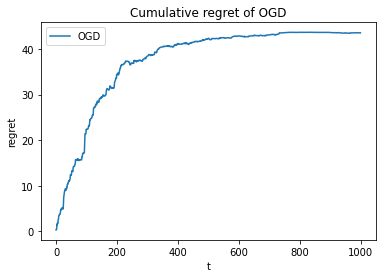

In [196]:
#testing OGD
cum_regrets = OGD()
plt.plot(cum_regrets[0], label="OGD")
plt.xlabel("t")
plt.ylabel("regret")
plt.title("Cumulative regret of OGD")
plt.legend()
plt.show()

In [200]:
def OGD_wg(T=5000, d=2, D=2, nruns = 100, theta_hat_0 = None):
    
    theta_star = 0.5/np.arange(1, d+1)
    x = np.random.multivariate_normal(np.zeros(d), np.eye(d), T)
    epsilon = np.random.normal(0, np.sqrt(0.1), T)
    y = x @ theta_star + epsilon

    cum_regrets = []

    #we compute a Lipschitz constant for the gradient of the loss
    G = 2*np.max(np.linalg.norm(x, axis=1) * (np.linalg.norm(x, axis=1) + np.abs(y)))

    #we use the theoretical values of delta and eta
    delta = np.sqrt(d/(4*G))*T**(-1/4)
    eta = D / np.sqrt(4*G*d) * T ** (-3/4)


    def loss(t, theta):
        return (y[t] - np.dot(x[t], theta))**2

    #projection onto the ball
    def projection(theta):
        a = np.linalg.norm(theta)/(1-delta)
        return theta if a < 1 else theta/a
    
    for _ in range(nruns):
        
        regret = []

        #initialization of theta
        if theta_hat_0 is None:
            theta_hat_0 = np.zeros(d)

        theta_hat = theta_hat_0

        for t in range(T):
            #draw u_t uniformly at random on the unit sphere
            u = np.random.normal(0, 1, d)
            u = u / np.linalg.norm(u)

            #play theta and incur loss
            theta = theta_hat + delta * u
            regret.append(loss(t, theta) - loss(t, theta_star))

            #update theta_hat
            grad = d/delta * loss(t, theta) * u
            theta_hat = projection(theta_hat - eta * grad)
        
        cum_regrets.append(np.cumsum(regret))

    return np.array(cum_regrets)

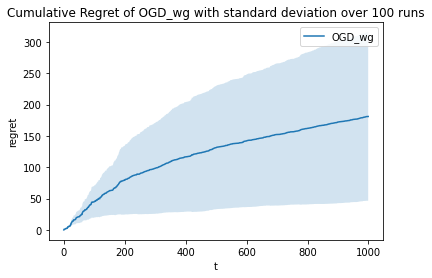

In [205]:
#testing OGD_wg (without gradients)
cum_regrets = OGD_wg(T=1000, nruns=100)

#plot the mean cumulative regret with standard deviation window
plt.plot(np.mean(cum_regrets, axis=0), label='OGD_wg')
plt.fill_between(np.arange(cum_regrets[0].shape[0]), np.mean(cum_regrets, axis=0) - np.std(cum_regrets, axis=0), np.mean(cum_regrets, axis=0) + np.std(cum_regrets, axis=0), alpha=0.2)
plt.xlabel('t')
plt.ylabel('regret')
plt.title('Cumulative Regret of OGD_wg with standard deviation over 100 runs')
plt.legend()
plt.show()

# Question 7.b)

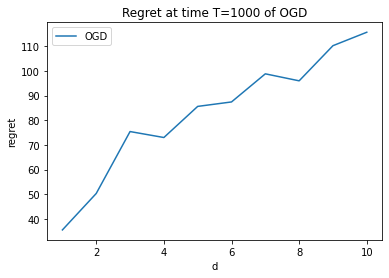

In [219]:
#testing the variation to the dimension d in OGD
d_values = np.arange(1, 11)
regrets = []
for d in d_values:
    cum_regrets = OGD(d=d)
    regrets.append(cum_regrets[0][-1])

plt.plot(d_values, regrets, label='OGD')
plt.xlabel('d')
plt.ylabel('regret')
plt.title('Regret at time T=1000 of OGD')
plt.legend()
plt.show()

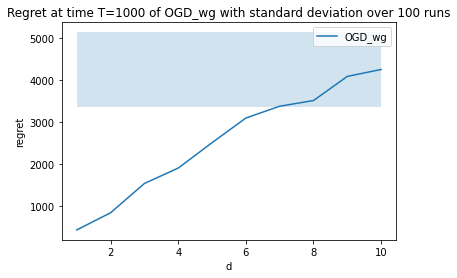

In [216]:
#testing the variation to the dimension d in OGD_wg, with standard deviation window
d_values = np.arange(1, 11)
regrets = []
for d in d_values:
    cum_regrets = OGD_wg(d=d, nruns=100)
    regrets.append(np.mean(cum_regrets[:, -1]))
    #values for fill between
    lower = np.mean(cum_regrets[:, -1]) - np.std(cum_regrets[:, -1])
    upper = np.mean(cum_regrets[:, -1]) + np.std(cum_regrets[:, -1])

plt.plot(d_values, regrets, label='OGD_wg')
plt.fill_between(d_values, lower, upper, alpha=0.2)
plt.xlabel('d')
plt.ylabel('regret')
plt.title('Regret at time T=1000 of OGD_wg with standard deviation over 100 runs')
plt.legend()
plt.show()


We can see that the regret increases with the dimension $d$ for both OGD and OGD without gradients. Also, from the result of question 6 we should have an increase that isn't stronger than $\sqrt{d}$ which seems to be verified on the plot of OGD without gradients.

# Part 2 : Best arm identification

# Fixed Budget

# Question 1.a)

We have $(\hat{k} \neq k^*) = \bigcup_{k \neq k^*}(\hat{\mu}_{T, k} > \hat{\mu}_{T, k^*}) = \bigcup_{k \neq k^*}(\hat{\mu}_{T, k} - \hat{\mu}_{T, k^*} - (-\Delta_k) > \Delta_k)$.
Using the union bound (we assume $k^* = 1$):
$$\mathbb{P}(\hat{k} \neq k^*) \leq \sum_{k=2}^K \mathbb{P}(\hat{\mu}_{T, k} - \hat{\mu}_{T, k^*} - (-\Delta_k) > \Delta_k)$$
${\mu}_{T, k} - \hat{\mu}_{T, k^*}$, is the mean of $T/K$ i.i.d. random variables with mean $\Delta_k$ and taking values in [-2, 2] (if we assume that each $X_t^k$ is in [-1, 1]). Using Hoeffding's inequality, we get :

$$\boxed{\mathbb{P}(\hat{k} \neq k^*) \leq \sum_{k=2}^T 2\exp(-2\Delta_k^2/(T/K16)) = 2\sum_{k=2}^T \exp(-\frac{K\Delta_k^2}{8T})}$$

# Question 2.a)

This is exactly the probability of error of uniform sampling with each arm being pulled $n_1$ times. Hence:

$\boxed{p \leq 2\sum_{k=2}^K \exp(-\frac{\Delta_k^2}{8n_1})}$

# Question 2.b)

If we set $S_n = \frac{1}{n} \sum_{i=1}^n B_i$ then we can get a confidence interval for $\mathbb{P}_{\nu}(\hat{k} \neq k^*)$ using Hoeffding's inequality:

$$\mathbb{P}(|S_n - \mathbb{P}_{\nu}(\hat{k} \neq k^*)| \geq t) \leq 2\exp(\frac{-2t^2}{n})$$

Or equivalently :

$$\boxed{\mathbb{P}(|S_n - \mathbb{P}_{\nu}(\hat{k} \neq k^*)| \leq \sqrt{\frac{n}{2} \log(\frac{2}{\delta})}) \geq 1-\delta }$$

# Question 2.c)

In [229]:
K = 20
means = np.array([0.5] + [0.4] * (K-1))
sigmas = np.ones(K)
T_list = [100, 500, 2000]

In [230]:
def uniform_sampling(T, means, sigmas):
    K = means.shape[0]
    mu_hat = np.zeros(K)
    N = np.zeros(K)
    rewards = []

    for k in range(K):
        for t in range(T//K):
            reward = np.random.normal(means[k], sigmas[k])
            mu_hat[k] += reward
            N[k] += 1
    
    return np.argmax(mu_hat/N)

In [231]:
def succesive_rejects(T, means, sigmas):
    K = means.shape[0]
    mu_hat = np.zeros(K)
    N = np.zeros(K)
    A = set(np.arange(K))
    log_bar = 1/2 + np.sum(1/np.arange(2, K+1))
    n = np.zeros(K)
    for j in range(1, K):
        n[j] = ceil((T-K)/(log_bar * (K+1 - j)))

    for j in range(1, K):
        n_rounds = int(n[j] - n[j-1])
        for i in A:
            for _ in range(n_rounds):
                reward = np.random.normal(means[i], sigmas[i])
                mu_hat[i] += reward
                N[i] += 1
        worst_arm = min([(mu_hat[k]/N[k], k) for k in range(K) if k in A])[1]
        A.remove(worst_arm)            
    
    return min(A)

The confidence interval that I derived in the previous question is not sharp enough so it gives no interesting confidence intervals for the succesive rejects algorithm. Hence in the following experiments confidence intervals are only given for the uniform sampling, which is actually just the upper bound derived in question 2.a).

In [237]:
n_experiments = 1000
for T in T_list:
    uniform =  np.array([uniform_sampling(T, means, sigmas) for n in range(n_experiments)])
    sr = np.array([succesive_rejects(T, means, sigmas) for n in range(n_experiments)])
    print('------------------------------------')
    print(f'Budget : {T}.')
    print(f'Error probability of uniform sampling : {np.mean(uniform != 0):.2f} %.')
    print(f'It should be between 0 and {2*(K-1)*np.exp(-K/T *(0.1)**2/8)}')
    print(f'Error probability of succesive rejects : {np.mean(sr != 0):.2f} %.')

------------------------------------
Budget : 100.
Error probability of uniform sampling : 0.80 %.
It should be between 0 and 37.99050118740105
Error probability of succesive rejects : 0.77 %.
------------------------------------
Budget : 500.
Error probability of uniform sampling : 0.62 %.
It should be between 0 and 37.99810004749921
Error probability of succesive rejects : 0.47 %.
------------------------------------
Budget : 2000.
Error probability of uniform sampling : 0.29 %.
It should be between 0 and 37.99952500296874
Error probability of succesive rejects : 0.17 %.


# Fixed confidence

# Question 1.a)

In [234]:
means = np.array([0.5, 0.4, 0.4] + [0.3]*7)
sigmas = np.ones(10)
delta = 1e-2

In [235]:
def UCB_rm(means, sigmas, T=10000):
    K = means.shape[0]
    mu_hat = np.zeros(K)
    N = np.zeros(K)
    rewards = []

    for t in range(1, T+1):

        #choose an arm
        if t<=K:
            k = t-1
        else:
            k = np.argmax(mu_hat/N + np.sqrt(2*np.log(t)/N))
        
        #sample the k th arm according to a Gaussian

        X = np.random.normal(means[k], sigmas[k])
        mu_hat[k] += X
        N[k] += 1

        rewards.append(X)
    
    return means[0] * np.arange(T) - np.cumsum(rewards)


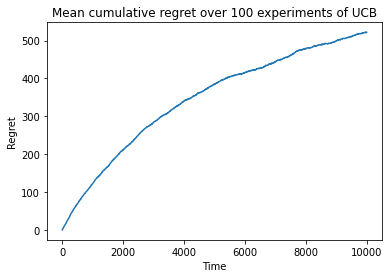

In [238]:
n_experiments = 100
mean_regret = np.mean(np.array([UCB_rm(means, sigmas) for n in range(n_experiments)]), axis=0)

plt.plot(np.arange(10000), mean_regret)
plt.xlabel('Time')
plt.ylabel('Regret')
plt.title(f'Mean cumulative regret over {n_experiments} experiments of UCB')
plt.show()

# Question 1.b)

In [239]:
def UCB_bai(means, sigmas):    
    K = means.shape[0]
    mu_hat = np.zeros(K)
    N = np.zeros(K)

    t = 0
    while True:
        t += 1
        #choose an arm : as UCB
        if t<=K:
            k = t-1
        else:
            k = np.argmax(mu_hat/N + np.sqrt(2*np.log(t)/N))
        
        #sample the k th arm according to a Gaussian

        X = np.random.normal(means[k], sigmas[k])
        mu_hat[k] += X
        N[k] += 1

        #stop according to the stopping rule, if all arms have been tried

        if t < K:
            continue
        star = np.argmax(mu_hat/N)
        mu_star = mu_hat[star]/N[star]
        N_star = N[star]
        
        lhs = 0.5 * min([(mu_star-mu_hat[k]/N[k])/(1/N_star+1/N[k]) for k in range(K) if k != star])
        rhs = -np.log(delta) + 3 * np.log(1+np.log(t))
        if lhs > rhs:
            break

    return np.argmax(N), t


In [240]:
def UNIFORM_bai(means, sigmas):    
    K = means.shape[0]
    mu_hat = np.zeros(K)
    N = np.zeros(K)

    t = 0
    while True:
        t += 1
        #choose an arm : we do round robin
        
        k = (t-1) % K
        
        #sample the k th arm according to a Gaussian

        X = np.random.normal(means[k], sigmas[k])
        mu_hat[k] += X
        N[k] += 1

        #stop according to the stopping rule, if all arms have been tried

        if t < K:
            continue
        star = np.argmax(mu_hat/N)
        mu_star = mu_hat[star]/N[star]
        N_star = N[star]
        
        lhs = 0.5 * min([(mu_star-mu_hat[k]/N[k])/(1/N_star+1/N[k]) for k in range(K) if k != star])
        rhs = -np.log(delta) + 3 * np.log(1+np.log(t))
        if lhs > rhs:
            break

    return np.argmax(mu_hat/N), t


Accuracy of UCB_bai : 96.00 %.
Accuracy of UNIFORM_bai : 99.00 %.


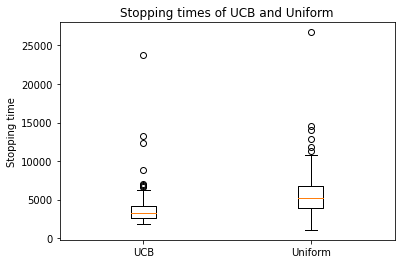

In [250]:
n_experiments = 100
ucb = np.array([UCB_bai(means, sigmas) for n in range(n_experiments)])
uniform = np.array([UNIFORM_bai(means, sigmas) for n in range(n_experiments)])

print(f'Accuracy of UCB_bai : {100*np.mean(ucb[:, 0] == 0):.2f} %.')
print(f'Accuracy of UNIFORM_bai : {100*np.mean(uniform[:, 0] == 0):.2f} %.')

#plot the stopping times of the two algorithms on the same boxplot

plt.boxplot([ucb[:, 1], uniform[:, 1]])
plt.xticks([1, 2], ['UCB', 'Uniform'])
plt.ylabel('Stopping time')
plt.title('Stopping times of UCB and Uniform')

plt.show()

# Question 2.a)

In [242]:
def TTUCB(means, sigmas, beta=0.5):
    K = means.shape[0]
    mu_hat = np.zeros(K)
    N = np.zeros(K)
    rewards = []

    t = 0
    while True:
        t += 1
        #compute the leader and the challenger

        if t <= K:
            k = t-1
        else:
            #UCB for the leader
            B = np.argmax(mu_hat/N + np.sqrt(2*np.log(t)/N))
            mu_B = mu_hat[B]/N[B]
            N_b = N[B]
            
            C = min([((mu_B - mu_hat[k]/N[k])/(1/N_b + 1/N[k]), k) for k in range(K) if k != B])[1]

            k = B if np.random.uniform() < beta else C
        
        #sample the k th arm according to a Gaussian

        X = np.random.normal(means[k], sigmas[k])
        mu_hat[k] += X
        N[k] += 1

        #stop according to the stopping rule, if all arms have been tried

        if t < K:
            continue
        star = np.argmax(mu_hat/N)
        mu_star = mu_hat[star]/N[star]
        N_star = N[star]

        lhs = 0.5 * min([(mu_star-mu_hat[k]/N[k])/(1/N_star+1/N[k]) for k in range(K) if k != star])
        rhs = -np.log(delta) + 3 * np.log(1+np.log(t))
        if lhs > rhs:
            break

    return np.argmax(mu_hat/N), t

# Question 2.b)

In [243]:
def EB_TC(means, sigmas, beta = 0.5):
    K = means.shape[0]
    mu_hat = np.zeros(K)
    N = np.zeros(K)
    rewards = []

    t = 0
    while True:
        t += 1
        #compute the leader and the challenger

        if t <= K:
            k = t-1
        else:
            # best empirical mean for the mean
            B = np.argmax(mu_hat/N + np.sqrt(2*np.log(t)/N))
            mu_B = mu_hat[B]/N[B]
            N_b = N[B]
            
            C = min([((mu_B - mu_hat[k]/N[k])/(1/N_b + 1/N[k]), k) for k in range(K) if k != B])[1]

            k = B if np.random.uniform() < beta else C
        
        #sample the k th arm according to a Gaussian

        X = np.random.normal(means[k], sigmas[k])
        mu_hat[k] += X
        N[k] += 1

        #stop according to the stopping rule, if all arms have been tried

        if t < K:
            continue
        star = np.argmax(mu_hat/N)
        mu_star = mu_hat[star]/N[star]
        N_star = N[star]
        
        lhs = 0.5 * min([(mu_star-mu_hat[k]/N[k])/(1/N_star+1/N[k]) for k in range(K) if k != star])
        rhs = -np.log(delta) + 3 * np.log(1+np.log(t))
        if lhs > rhs:
            break

    return np.argmax(mu_hat/N), t

# Question 2.c)

Accuracy of UCB_bai : 100.00 %.
Accuracy of UNIFORM_bai : 98.00 %.
Accuracy of TTUCB : 99.00 %.
Accuracy of EB_TC : 99.00 %.


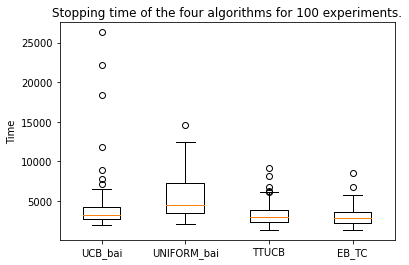

In [253]:
#compare the four algorithms
n_experiments = 100
ucb = np.array([UCB_bai(means, sigmas) for n in range(n_experiments)])
uniform = np.array([UNIFORM_bai(means, sigmas) for n in range(n_experiments)])
ttucb = np.array([TTUCB(means, sigmas) for n in range(n_experiments)])
eb_tc = np.array([EB_TC(means, sigmas) for n in range(n_experiments)])

print(f'Accuracy of UCB_bai : {100*np.mean(ucb[:, 0] == 0):.2f} %.')
print(f'Accuracy of UNIFORM_bai : {100*np.mean(uniform[:, 0] == 0):.2f} %.')
print(f'Accuracy of TTUCB : {100*np.mean(ttucb[:, 0] == 0):.2f} %.')
print(f'Accuracy of EB_TC : {100*np.mean(eb_tc[:, 0] == 0):.2f} %.')

#plot the stopping times of the four algorithms on the same boxplot
plt.figure()
plt.boxplot([ucb[:, 1], uniform[:, 1], ttucb[:, 1], eb_tc[:, 1]])
plt.ylabel('Time')
plt.title(f'Stopping time of the four algorithms for {n_experiments} experiments.')
plt.xticks([1, 2, 3, 4], ['UCB_bai', 'UNIFORM_bai', 'TTUCB', 'EB_TC'])

plt.show()

In terms of stopping time, the two best performing algorithms are the Top-Two algorithms although on this problem UCB_bai performs nearly as well. However UNIFORM_bai seems too basic and can't compete with algorithms exploiting the rewards obtained during the run. From several runs of UCB_bai it can be observed a strong variance of the stopping time with outliers with very high stopping time (actually the above figure is obtained after several tries, because some outliers of UCB completely flattened the box plots). An explanation could be that the exploration isn't present inherently in the algorithm so it might be very long to spot the best arm if it has badly performed in the first steps of the algorithm. \
Although it is hard to see on this figure, the EB-TC actually performs better than TTUCB. It might be because the exploration mechanism isn't necessary for the leader so the algorithm can focus more rapidly on the best arms and just in case explore with the challenger.